In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from subprocess import check_call

from datetime import datetime
from pathlib import Path

import roms_tools as rt

import config
import cson_forge

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Define the grid

Specify the grid name and parameters defining its geometry and MPI domain decomposition.

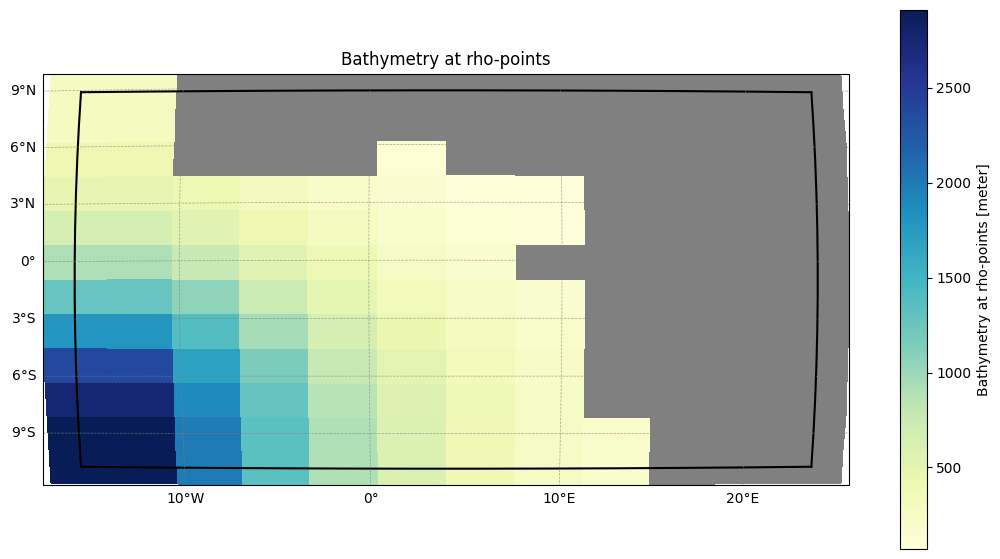

In [3]:
model_name = "roms-marbl"
grid_name = "gulf-guinea-toy"

start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 1, 2)

boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True, 
    }

np_eta = 5 # number of partitions in eta (y) 
np_xi = 2 # number of partitions in xi (x) 

grid_kwargs = dict(
    nx=10,           # number of grid points in x-direction
    ny=10,           # number of grid points in y-direction
    size_x=4000,       # domain size in x-direction (km)
    size_y=2000,       # domain size in y-direction (km)
    center_lon=4.0,    # center longitude (E)
    center_lat=-1.0,    # center latitude (S)
    rot=0,            # no rotation
    N=5,             # number of vertical layers
)

ocn = cson_forge.OcnModel(
    model_name=model_name,
    grid_name=grid_name,
    grid_kwargs=grid_kwargs,
    boundaries=boundaries,    
    start_time=start_time,
    end_time=end_time,
    np_eta=np_eta,
    np_xi=np_xi,
)
ocn.grid.plot()

In [4]:
ocn.prepare_source_data(clobber=False)

⬇️  Downloading GLORYS_REGIONAL for 2012-01-01 → cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_gulf-guinea-toy_20120101.nc


INFO - 2025-11-21T20:28:20Z - Selected dataset version: "202311"
2025-11-21 20:28:20 - INFO - Selected dataset version: "202311"
INFO - 2025-11-21T20:28:20Z - Selected dataset part: "default"
2025-11-21 20:28:20 - INFO - Selected dataset part: "default"
INFO - 2025-11-21T20:28:25Z - Starting download. Please wait...
2025-11-21 20:28:25 - INFO - Starting download. Please wait...


  0%|          | 0/66 [00:00<?, ?it/s]

2025-11-21 20:28:41 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:28:41 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:28:41 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:28:41 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:28:41 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:28:41 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
INFO - 2025-11-21T20:28:41Z - Successfully downloaded to /Users/mclong/cson-forge-data/source-data/GLORYS_REGIONAL/cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_gulf-guinea-toy_20120101.nc
2025-11-21 20:28:41 - INFO

⬇️  Downloading GLORYS_REGIONAL for 2012-01-02 → cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_gulf-guinea-toy_20120102.nc


INFO - 2025-11-21T20:28:45Z - Selected dataset version: "202311"
2025-11-21 20:28:45 - INFO - Selected dataset version: "202311"
INFO - 2025-11-21T20:28:45Z - Selected dataset part: "default"
2025-11-21 20:28:45 - INFO - Selected dataset part: "default"
INFO - 2025-11-21T20:28:49Z - Starting download. Please wait...
2025-11-21 20:28:49 - INFO - Starting download. Please wait...


  0%|          | 0/66 [00:00<?, ?it/s]

2025-11-21 20:29:06 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:29:06 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:29:06 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:29:06 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:29:06 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-21 20:29:06 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
INFO - 2025-11-21T20:29:07Z - Successfully downloaded to /Users/mclong/cson-forge-data/source-data/GLORYS_REGIONAL/cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_gulf-guinea-toy_20120102.nc
2025-11-21 20:29:07 - INFO

✔️  TPXO dataset verified at: /Users/mclong/cson-forge-data/source-data/TPXO/TPXO10.v2
✔️  Using existing BGC dataset: /Users/mclong/cson-forge-data/source-data/UNIFIED_BGC/BGCdataset.nc


In [5]:
inputs = ocn.generate_inputs(clobber=True)

2025-11-21 20:29:07 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy/roms_grid.nc
2025-11-21 20:29:07 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [1/9] Writing ROMS grid...

▶️  [2/9] Generating initial conditions...


2025-11-21 20:29:09 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy/roms_initial_conditions.nc


[########################################] | 100% Completed | 6.90 sms


2025-11-21 20:29:16 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.



▶️  [3/9] Generating surface forcing (physics)...


2025-11-21 20:30:42 - INFO - Data will be interpolated onto the fine grid. Remember to set `interp_frc = 0` in your `bulk_frc.opt` ROMS option file.
2025-11-21 20:30:50 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy/roms_surface_forcing_201201.nc


[########################################] | 100% Completed | 7.48 ss


2025-11-21 20:31:02 - INFO - Data will be interpolated onto the fine grid. Remember to set `interp_frc = 0` in your `bgc.opt` ROMS option file.
2025-11-21 20:31:02 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy/roms_surface_forcing_bgc_clim.nc



▶️  [4/9] Generating surface forcing (BGC)...
[########################################] | 100% Completed | 107.55 ms


2025-11-21 20:31:02 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [5/9] Generating boundary forcing (physics)...


2025-11-21 20:31:04 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy/roms_boundary_forcing_201201.nc


[########################################] | 100% Completed | 428.90 ms


2025-11-21 20:31:05 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [6/9] Generating boundary forcing (BGC)...


2025-11-21 20:31:07 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy/roms_boundary_forcing_bgc_clim.nc


[########################################] | 100% Completed | 12.18 s

▶️  [7/9] Generating tidal forcing...


2025-11-21 20:31:21 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy/roms_tidal_forcing.nc


[########################################] | 100% Completed | 1.91 sms

▶️  [8/9] Generating river forcing...


2025-11-21 20:31:23 - INFO - No river indices provided. Identify all rivers within the ROMS domain and assign each of them to the nearest coastal point.
2025-11-21 20:31:23 - INFO - Compute climatology for river forcing.
2025-11-21 20:31:23 - INFO - Creating 7 synthetic river(s) to handle overlapping entries.
2025-11-21 20:31:23 - WARNING - NaNs detected in 'river_volume' and set to zero. This may indicate missing river data and affect model accuracy. 
2025-11-21 20:31:23 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy/roms_rivers.nc



▶️  [9/9] Partitioning input files across tiles...

✅ All input files generated and partitioned.

📄  Wrote ROMSInputs blueprint to /Users/mclong/codes/cson-forge/workflows/blueprints/roms-marbl_gulf-guinea-toy/blueprint_roms-marbl-gulf-guinea-toy.yml


### Quick look at some forcing

[########################################] | 100% Completed | 310.56 ms


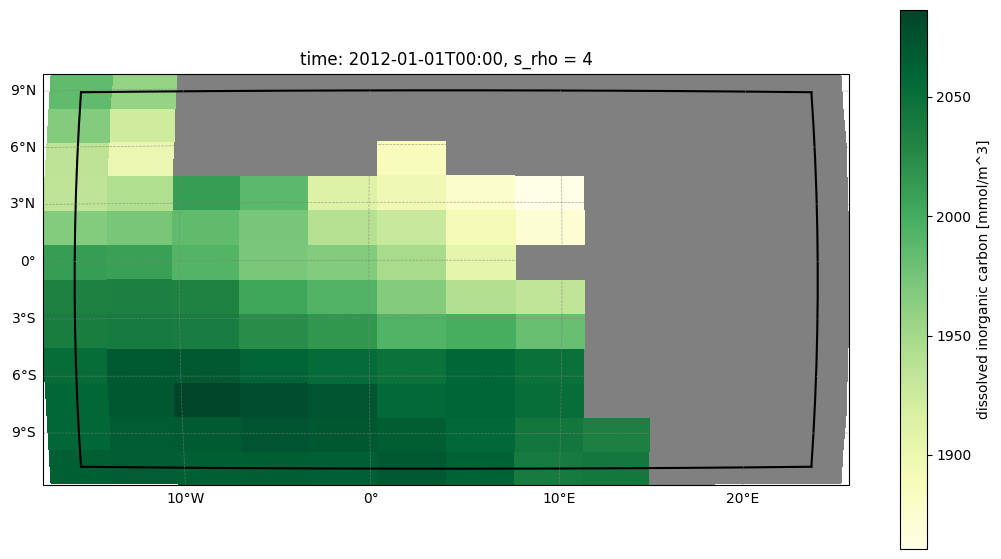

In [6]:
inputs["initial_conditions"].plot("DIC", s=-1)

[########################################] | 100% Completed | 527.33 ms


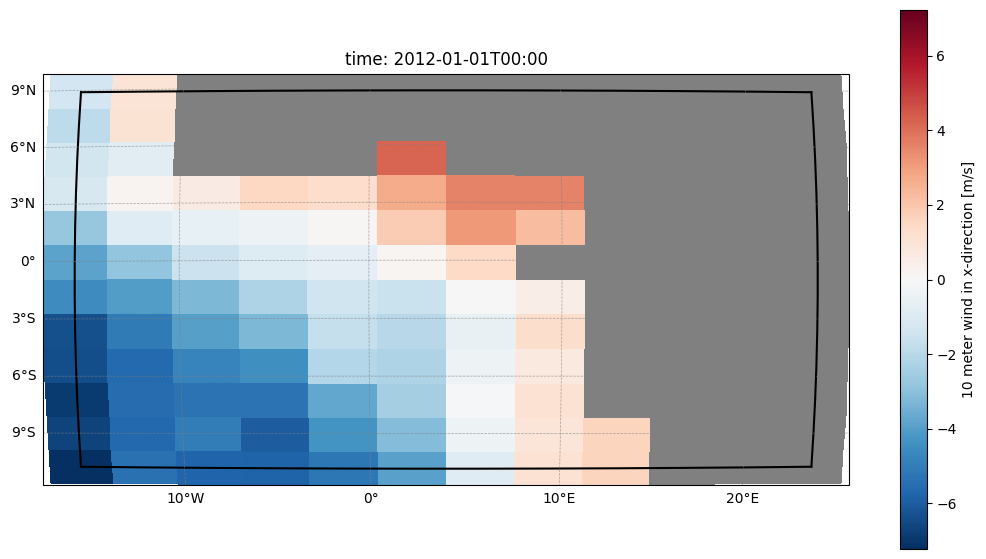

In [7]:
inputs["surface_forcing"].plot("uwnd", time=0)

## Build the model

Apply templating to source code and input files, then build the model

In [8]:
parameters = {
    "param.opt": dict(NP_XI=np_xi, NP_ETA=np_eta, NX=ocn.grid.nx, NY=ocn.grid.ny, NK=ocn.grid.N),
    "river_frc.opt": dict(nriv=inputs["rivers"].ds.sizes["nriver"]),
}

ocn.build(parameters, clean=True)

Build token: 20251121T203128Z-822c5870
Building roms-marbl for grid: gulf-guinea-toy
roms-marbl opt_base_dir : /Users/mclong/codes/cson-forge/workflows/model-configs/opt_base/opt_base_roms-marbl-cson-default
ROMS opt_dir      : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/opt
ROMS build_dir    : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/bld
Input data path   : /Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy
ROMS_ROOT         : /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL_ROOT        : /Users/mclong/cson-forge-data/codes/MARBL
Conda env         : roms_env
Logs              : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/logs
Conda env 'roms_env' already exists.
Using compiler kind: gnu
Found 0 existing build(s) in /Users/mclong/codes/cson-forge/workflows/builds.yml.
ROMS repo already present at /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL repo already present at 

PosixPath('/Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/exe/roms-marbl-gulf-guinea-toy-20251121T203128Z-822c5870')

In [9]:
ocn.run(case="test.001")

Copying settings input files from /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/opt to /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001:
  roms.in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001/roms.in
  marbl_in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001/marbl_in
  marbl_tracer_output_list -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001/marbl_tracer_output_list
Rendering master settings file: roms.in
  Rendered roms.in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001/roms.in
Copying executable to run directory:
  /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/exe/roms-marbl-gulf-guinea-toy-20251121T203128Z-822c5870 -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001/roms-marbl-gulf-guinea-toy-20251121T203128Z-822c5870
R

RuntimeError: Model run failed with exit code 11. See log file for details: /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001/test.001.20251121T203245Z.log